### Carga de librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import re
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import time
from datetime import datetime
import os

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#cross_val_score(XGBClassifier(), X, y)

### Carga del Dataset ya Tratado con Feature Engineering

In [3]:
dataset = pd.read_csv('DataTratada.csv', encoding = 'latin-1')
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
dataset

,Unnamed0,Tipo_Contrato,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,0,1.0,-0.638445,-0.638117,0.437744,1.046054,0.911839,0.914190,0.574789,-1.717887,0.664697,1.932094,-2.270889,0.134303,0.134548,-0.713743,-0.660541,-0.989562,-0.329472,-0.961302
1,1,1.0,-0.638445,-0.638117,0.437744,1.046054,0.756648,0.760624,0.562767,0.655072,-0.057810,1.932094,-2.270889,0.134303,0.134548,-0.713743,-0.708417,-0.989562,-0.329472,-0.968855
2,2,1.0,1.818773,1.818742,0.437744,-1.840944,0.756648,0.760624,0.562767,1.356667,-1.058205,-0.449562,-1.462718,-0.171121,-0.170838,-0.105986,1.654940,0.739190,0.037578,-0.934865
3,3,1.0,1.818773,1.818742,0.437744,1.046054,0.756648,0.760624,0.562767,0.898779,-1.058205,-0.449562,-1.462718,-0.171121,-0.170838,-0.737119,-0.691008,0.405454,1.287294,-0.965079
4,4,1.0,-0.228196,-0.227928,-2.278211,0.027309,0.911839,0.914190,0.574789,-0.863569,0.144937,-0.449562,0.692404,-0.171121,-0.170838,2.073759,1.654940,0.632395,0.247320,-0.912205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,2326,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,1.713531,0.447945,1.932094,0.692404,0.134303,0.134548,2.073759,-0.368930,0.739190,1.558212,-0.810235
2327,2327,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,-0.930195,0.447945,-0.449562,0.692404,-0.171121,-0.170838,2.073759,-0.368930,0.739190,1.558212,-0.443898
2328,2328,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,-1.076830,0.447945,4.313750,0.692404,0.439726,0.439934,2.073759,-0.368930,0.632395,1.558212,-0.810235
2329,2329,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,-0.988953,0.447945,1.932094,0.692404,0.134303,0.134548,0.525147,-0.368930,0.739190,-0.705261,-0.957525


### Definición de las Variables

In [4]:
y = dataset['Tipo_Contrato']
X = dataset.drop(['Tipo_Contrato'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2022)

### Entrenamiento de los Modelos de Clasificación

In [5]:
inicio = time.time()
Nb = GridSearchCV(GaussianNB(), {'var_smoothing': [0.9]},cv=10).fit(X_train, y_train)
Log = GridSearchCV(LogisticRegression(), {'solver':['liblinear'], 'verbose':[3],'max_iter':[100]},  cv=10).fit(X_train, y_train)
LDA = GridSearchCV(LinearDiscriminantAnalysis(), {'solver':['svd','lsqr']},  cv=10).fit(X_train, y_train)
svm = GridSearchCV(SVC(), {'C': [0.1], 'kernel': ['linear']}, cv=2).fit(X_train, y_train)
randFor = GridSearchCV(RandomForestClassifier(), {'n_estimators': [20, 50, 100], 'max_depth': [10, 100, 200]}).fit(X_train, y_train)
AB = GridSearchCV(AdaBoostClassifier(),{'n_estimators': [55]},cv=10).fit(X_train, y_train)
#GB = GridSearchCV(GradientBoostingClassifier(), {'loss':['log_loss']},cv=10).fit(X_train, y_train)
TD = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini'], 'min_impurity_decrease':[0.000001], 'random_state':[2]},cv=2).fit(X_train, y_train)
QuadDA = GridSearchCV(QuadraticDiscriminantAnalysis(), {'store_covariance': ['T']},cv=10).fit(X_train, y_train)
LinearDA = GridSearchCV(LinearDiscriminantAnalysis(), {'solver': ['lsqr']},cv=2).fit(X_train, y_train)
xgb = XGBClassifier(objective="binary:logistic", random_state=42)
xgb.fit(X_train, y_train)
LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')
fin = time.time()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][23:54:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20]	training's binary_logloss: 0.109474	valid_0's binary_logloss: 0.119628
[40]	training's binary_logloss: 0.0272878	valid_0's binary_logloss: 0.0394858
[60]	training's binary_logloss: 0.00739674	valid_0's binary_logloss: 0.0229489
[80]	training's binary_logloss: 0.00210801	valid_0's binary_logloss: 0.0210001
[100]	training's binary_logloss: 0.000630551	valid_0's binary_logloss: 0.0228667


### Score de los Modelos

In [6]:
print('Naive Bayes = '+str(Nb.score(X_train,y_train)))
print('Logistica = '+str(Log.score(X_train,y_train)))
print('LDA = '+str(LDA.score(X_train,y_train)))
print('SVM = '+str(svm.score(X_train,y_train)))
print('Random Forest = '+str(randFor.score(X_train,y_train)))
print('Ada Boost = '+str(AB.score(X_train,y_train)))
print('QuadDA = '+str(QuadDA.score(X_train,y_train)))
print('LinearDA = '+str(LinearDA.score(X_train,y_train)))
#print('GB = '+str(GB.score(X,y)))
print('Tree Decision = '+str(TD.score(X_train,y_train)))
print('LGBM = {:.4f}'.format(LGBM.score(X_test,y_test)))
print('XGBoost = {:.4f}'.format(xgb.score(X_test,y_test)))

Naive Bayes = 0.5652973635806254
Logistica = 0.8491722869405273
LDA = 0.8479460453709381
SVM = 0.8565297363580625
Random Forest = 1.0
Ada Boost = 0.9920294297976702
QuadDA = 0.7516860821581851
LinearDA = 0.8485591661557327
Tree Decision = 1.0
LGBM = 0.9929
XGBoost = 0.9929


### Predicciones de los Modelos

In [7]:
y_preds_NB = Nb.predict(X_test)
y_preds_Log = Log.predict(X_test)
y_preds_LDA = LDA.predict(X_test)
y_preds_svm = svm.predict(X_test)
y_preds_randFor = randFor.predict(X_test)
y_preds_QuadDA = QuadDA.predict(X_test)
y_preds_LinearDA = LinearDA.predict(X_test)
y_preds_AB = AB.predict(X_test)
y_preds_TD = TD.predict(X_test)
y_preds_LGBM = LGBM.predict(X_test)
y_preds_XGBoost = xgb.predict(X_test)

### Accuracy De las Predicciones

In [8]:
print("Accuracy NB: ", accuracy_score(y_test, y_preds_NB))
print("Accuracy Log: ", accuracy_score(y_test, y_preds_Log))
print("Accuracy LDA: ", accuracy_score(y_test, y_preds_LDA))
print("Accuracy SVM: ", accuracy_score(y_test, y_preds_svm))
print("Accuracy Random Forest: ", accuracy_score(y_test, y_preds_randFor))
print("Accuracy QuadDA: ", accuracy_score(y_test, y_preds_QuadDA))
print("Accuracy LinearDA: ", accuracy_score(y_test, y_preds_LinearDA))
print("Accuracy Ada Boost: ", accuracy_score(y_test, y_preds_AB))
print("Accuracy Tree Decition: ", accuracy_score(y_test, y_preds_TD))
print("Accuracy LGBM: ", accuracy_score(y_test, y_preds_LGBM))
print("Accuracy XGBoost: ", accuracy_score(y_test, y_preds_XGBoost))

Accuracy NB:  0.5485714285714286
Accuracy Log:  0.84
Accuracy LDA:  0.8528571428571429
Accuracy SVM:  0.86
Accuracy Random Forest:  0.9871428571428571
Accuracy QuadDA:  0.7628571428571429
Accuracy LinearDA:  0.8528571428571429
Accuracy Ada Boost:  0.9814285714285714
Accuracy Tree Decition:  0.9771428571428571
Accuracy LGBM:  0.9928571428571429
Accuracy XGBoost:  0.9928571428571429


### Matrices de Confusión

In [9]:
conf_matrixNB = pd.crosstab(y_test, y_preds_NB, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Naive Bayes: \n\n", conf_matrixNB)
conf_matrixLDA = pd.crosstab(y_test, y_preds_LDA, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión LDA: \n\n", conf_matrixLDA)
conf_matrixLog = pd.crosstab(y_test, y_preds_Log, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Logistica: \n\n", conf_matrixLog)
conf_matrixSVM = pd.crosstab(y_test, y_preds_svm, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión SVM: \n\n", conf_matrixSVM)
conf_matrixrandFor = pd.crosstab(y_test, y_preds_randFor, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Random Forest: \n\n", conf_matrixrandFor)
conf_matrixQuadDA = pd.crosstab(y_test, y_preds_QuadDA, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Quadratic Discriminant Analisys: \n\n", conf_matrixQuadDA)
conf_matrixLinearDA = pd.crosstab(y_test, y_preds_LinearDA, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Linear Discriminant Analisys: \n\n", conf_matrixLinearDA)
conf_matrixAB = pd.crosstab(y_test, y_preds_AB, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Ada Boost: \n\n", conf_matrixAB)
conf_matrixTD = pd.crosstab(y_test, y_preds_TD, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Tree Decision: \n\n", conf_matrixTD)
conf_matrixLGBM = pd.crosstab(y_test, y_preds_LGBM, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión LGBM: \n\n", conf_matrixLGBM)
conf_matrixXGBoost = pd.crosstab(y_test, y_preds_XGBoost, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión XGBoost: \n\n", conf_matrixXGBoost)

Matriz de Confusión Naive Bayes: 

 Predicción   0.0
observación     
0.0          384
1.0          316
Matriz de Confusión LDA: 

 Predicción   0.0  1.0
observación          
0.0          335   49
1.0           54  262
Matriz de Confusión Logistica: 

 Predicción   0.0  1.0
observación          
0.0          339   45
1.0           67  249
Matriz de Confusión SVM: 

 Predicción   0.0  1.0
observación          
0.0          349   35
1.0           63  253
Matriz de Confusión Random Forest: 

 Predicción   0.0  1.0
observación          
0.0          383    1
1.0            8  308
Matriz de Confusión Quadratic Discriminant Analisys: 

 Predicción   0.0  1.0
observación          
0.0          298   86
1.0           80  236
Matriz de Confusión Linear Discriminant Analisys: 

 Predicción   0.0  1.0
observación          
0.0          335   49
1.0           54  262
Matriz de Confusión Ada Boost: 

 Predicción   0.0  1.0
observación          
0.0          376    8
1.0            5  311
Matriz de

### **ROC (Receiver Operating Characteristics) & AUC (Area under de curve)**

In [10]:
print('ROC-AUC -> NB = ', roc_auc_score(y_test, y_preds_NB, multi_class='ovr'))
print('ROC-AUC -> Log = ', roc_auc_score(y_test, y_preds_Log, multi_class='ovo'))
print('ROC-AUC -> LDA = ', roc_auc_score(y_test, y_preds_LDA, multi_class='ovo'))
print('ROC-AUC -> Tree Decision = ', roc_auc_score(y_test, y_preds_TD, multi_class='ovo'))
print('ROC-AUC -> SVM = ', roc_auc_score(y_test, y_preds_svm, multi_class='ovo'))
print('ROC-AUC -> Random Forest = ', roc_auc_score(y_test, y_preds_randFor, multi_class='ovo'))
print('ROC-AUC -> QuadDA = ', roc_auc_score(y_test, y_preds_QuadDA, multi_class='ovo'))
print('ROC-AUC -> LinearDA = ', roc_auc_score(y_test, y_preds_LinearDA, multi_class='ovo'))
print('ROC-AUC -> Ada Boost = ', roc_auc_score(y_test, y_preds_AB, multi_class='ovo'))
print('ROC-AUC -> LGBM = ', roc_auc_score(y_test, y_preds_LGBM, multi_class='ovo'))
print('ROC-AUC -> XGBoost = ', roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovo'))

ROC-AUC -> NB =  0.5
ROC-AUC -> Log =  0.8353935917721519
ROC-AUC -> LDA =  0.8507548786919832
ROC-AUC -> Tree Decision =  0.9763647151898734
ROC-AUC -> SVM =  0.8547435390295359
ROC-AUC -> Random Forest =  0.9860396888185653
ROC-AUC -> QuadDA =  0.7614385548523206
ROC-AUC -> LinearDA =  0.8507548786919832
ROC-AUC -> Ada Boost =  0.9816719409282699
ROC-AUC -> LGBM =  0.9920886075949367
ROC-AUC -> XGBoost =  0.9929291930379747


In [28]:
svm_prob, svm_prob_v, _ = roc_curve(y_test, y_preds_svm)
nb_prob, nb_prob_v, _ = roc_curve(y_test, y_preds_NB)
tree_prob, tree_prob_v, _ = roc_curve(y_test, y_preds_TD)
log_prob, log_prob_v, _ = roc_curve(y_test, y_preds_Log)
xgb_prob, xgb_prob_v, _ = roc_curve(y_test, y_preds_XGBoost)

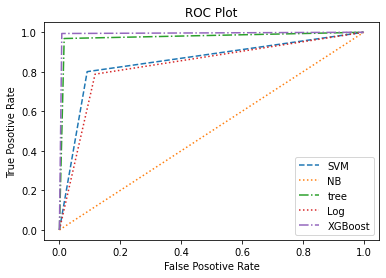

<Figure size 720x720 with 0 Axes>

In [39]:
plt.plot(svm_prob, svm_prob_v, linestyle="--", label="SVM")
plt.plot(nb_prob, nb_prob_v, linestyle=':', label="NB")
plt.plot(tree_prob, tree_prob_v, linestyle='-.', label="tree")
plt.plot(log_prob, log_prob_v, linestyle='dotted', label="Log")
plt.plot(xgb_prob, xgb_prob_v, linestyle='dashdot', label="XGBoost")

#plt.figure(figsize = (10,10))
plt.title("ROC Plot")
plt.xlabel("False Posotive Rate")
plt.ylabel("True Posotive Rate")
plt.legend()
plt.figure(figsize = (10,10))
plt.show()

### Selección del Mejor Modelo y Generación del CSV con Predicciones

In [11]:
list = [roc_auc_score(y_test, y_preds_NB, multi_class='ovr'), roc_auc_score(y_test, y_preds_Log, multi_class='ovo'),roc_auc_score(y_test, y_preds_LDA, multi_class='ovo'),roc_auc_score(y_test, y_preds_TD, multi_class='ovo'),roc_auc_score(y_test, y_preds_svm, multi_class='ovo'),roc_auc_score(y_test, y_preds_randFor, multi_class='ovo'),roc_auc_score(y_test, y_preds_QuadDA, multi_class='ovo'),roc_auc_score(y_test, y_preds_LinearDA, multi_class='ovo'),roc_auc_score(y_test, y_preds_AB, multi_class='ovo'),roc_auc_score(y_test, y_preds_LGBM, multi_class='ovo'),roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovo')]
mejor = max(list)
pos = list.index(mejor)

if list.index(mejor) == 0:
    print("El mejor moodelo es Naive Bayes")
    TP = conf_matrixNB.iloc[1,1]
    TN = conf_matrixNB.iloc[0,0]
    FN = conf_matrixNB.iloc[1,0]
    FP = conf_matrixNB.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_NB, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_NB)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Naive Bayes" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Naive Bayes = " +str(roc_auc_score(y_test, y_preds_NB, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 1:
    print("El mejor moodelo es Logistica")
    TP = conf_matrixLog.iloc[1,1]
    TN = conf_matrixLog.iloc[0,0]
    FN = conf_matrixLog.iloc[1,0]
    FP = conf_matrixLog.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_Log, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_Log)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Logistica" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Logistica = " +str(roc_auc_score(y_test, y_preds_Log, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()


elif list.index(mejor) == 2:
    print("El mejor moodelo es LDA")
    TP = conf_matrixLDA.iloc[1,1]
    TN = conf_matrixLDA.iloc[0,0]
    FN = conf_matrixLDA.iloc[1,0]
    FP = conf_matrixLDA.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_LDA, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_LDA)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es LDA" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ TN/(TN+FP) + os.linesep)
    file.write("ROC-AUC LDA = " +str(roc_auc_score(y_test, y_preds_LDA, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 3:
    print("El mejor moodelo es Tree Decision")
    TP = conf_matrixTD.iloc[1,1]
    TN = conf_matrixTD.iloc[0,0]
    FN = conf_matrixTD.iloc[1,0]
    FP = conf_matrixTD.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_TD, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_TD)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Tree Decision" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Tree Decision = " +str(roc_auc_score(y_test, y_preds_TD, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 4:
    print("El mejor moodelo es SVM")
    TP = conf_matrixSVM.iloc[1,1]
    TN = conf_matrixSVM.iloc[0,0]
    FN = conf_matrixSVM.iloc[1,0]
    FP = conf_matrixSVM.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precisio: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_SVM, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio))
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_SVM)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es SVM" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC SVM = " +str(roc_auc_score(y_test, y_preds_SVM, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
    
elif list.index(mejor) == 5:
    print("El mejor moodelo es  Random Forest")
    TP = conf_matrixrandFor.iloc[1,1]
    TN = conf_matrixrandFor.iloc[0,0]
    FN = conf_matrixrandFor.iloc[1,0]
    FP = conf_matrixrandFor.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_randFor, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio))
    print('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_randFor)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Random Forest" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Random Forest = " +str(roc_auc_score(y_test, y_preds_randFor, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 6:
    print("El mejor moodelo es  Quadratic Discriminant Analisys")
    TP = conf_matrixQuadDA.iloc[1,1]
    TN = conf_matrixQuadDA.iloc[0,0]
    FN = conf_matrixQuadDA.iloc[1,0]
    FP = conf_matrixQuadDA.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_QuadDA, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_QuadDA)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Quadratic Discriminant Analisys" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Quadratic Discriminant Analisys = " +str(roc_auc_score(y_test, y_preds_y_preds_QuadDA, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 7:
    print("El mejor moodelo es  Linear Discriminant Analisys")
    TP = conf_matrixLinearDA.iloc[1,1]
    TN = conf_matrixLinearDA.iloc[0,0]
    FN = conf_matrixLinearDA.iloc[1,0]
    FP = conf_matrixLinearDA.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_LinearDA, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_LinearDA)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Linear Discriminant Analisys" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Linear Discriminant Analisys = " +str(roc_auc_score(y_test, y_preds_y_preds_LinearDA, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+ str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
    
elif list.index(mejor) == 8:
    print("El mejor moodelo es  Ada Boost")
    TP = conf_matrixAB.iloc[1,1]
    TN = conf_matrixAB.iloc[0,0]
    FN = conf_matrixAB.iloc[1,0]
    FP = conf_matrixAB.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_AB, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_AB)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Ada Boost" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Ada Boost = " +str(roc_auc_score(y_test, y_preds_y_preds_AB, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+ str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
    
elif list.index(mejor) == 9:
    print("El mejor moodelo es  LGBM")
    TP = conf_matrixLGBM.iloc[1,1]
    TN = conf_matrixLGBM.iloc[0,0]
    FN = conf_matrixLGBM.iloc[1,0]
    FP = conf_matrixLGBM.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_LGBM, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_LGBM)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es LGBM" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC LGBM = " +str(roc_auc_score(y_test, y_preds_y_preds_LGBM, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+ str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
   
elif list.index(mejor) == 10:
    print("El mejor moodelo es  XGBoost")
    TP = conf_matrixXGBoost.iloc[1,1]
    TN = conf_matrixXGBoost.iloc[0,0]
    FN = conf_matrixXGBoost.iloc[1,0]
    FP = conf_matrixXGBoost.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio))
    print('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_XGBoost)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es XGBoost" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC XGBoost = " +str(roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close() 

El mejor moodelo es  XGBoost
Exactitud:  0.5
Precision:  0.5
Sensitividad:  0.9936708860759493
Especificidad:  0.9921875
ROC AUC:  0.9929291930379747
El tiempo de entrenamiento de modelos tardo: 60.25643229484558
Fecha y hora de ejecución: 2022-07-04 23:54


###  Conclusiones

1. Luego de haber utilizado 